In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [743]:
training_set= pd.read_csv("train.csv")
test_set=pd.read_csv("test.csv")


In [744]:
training_set = training_set.drop(['Ticket', 'PassengerId', 'Cabin','Name'], axis=1)
test_set = test_set.drop(['PassengerId','Ticket', 'Cabin','Name'], axis=1)


In [745]:
training_set.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [746]:
#To Check Null Value
training_set.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [747]:
training_set['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [748]:
#Handling MIssing value of Age
training_set['Age'].fillna(training_set['Age'].mean(), inplace=True)

In [749]:
training_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [750]:
training_set['Embarked']=training_set['Embarked'].fillna(0)

In [751]:
#All Null values are sorted
training_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [752]:
#Handling Boolean Value in Sex and embarked

#Encoded the Sex and Embarked Column
sexMap = {'male':0, 'female':1}
embarkedMap = {'S':0, 'Q':1, 'C':2}

training_set['Embarked'] = training_set['Embarked'].map(embarkedMap)
training_set['Sex'] = training_set['Sex'].map(sexMap)

In [753]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


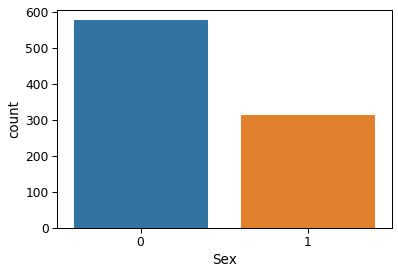

In [754]:
sns.countplot(x='Sex',data=training_set)

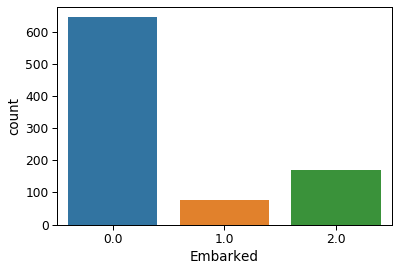

In [755]:
sns.countplot(x='Embarked',data=training_set)

In [756]:
#Applying Feature Scaling to Age and Fare Column 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [757]:
features=['Age','Fare']


In [758]:
training_set[features] = sc.fit_transform(training_set[features])


In [759]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.592481,1,0,-0.502445,0.0
1,1,1,1,0.638789,1,0,0.786845,2.0
2,1,3,1,-0.284663,0,0,-0.488854,0.0
3,1,1,1,0.407926,1,0,0.420730,0.0
4,0,3,0,0.407926,0,0,-0.486337,0.0


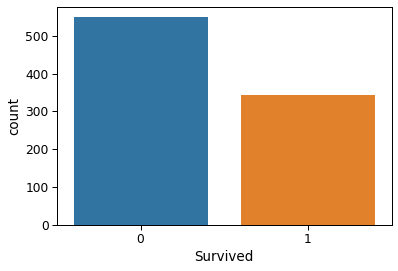

In [760]:
sns.countplot(x='Survived',data=training_set)

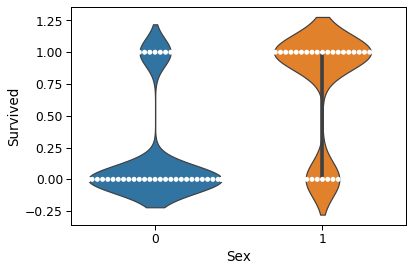

In [761]:
sns.violinplot(x='Sex',y='Survived',data=training_set)

sns.swarmplot(x='Sex',y='Survived',data=training_set, color='white')


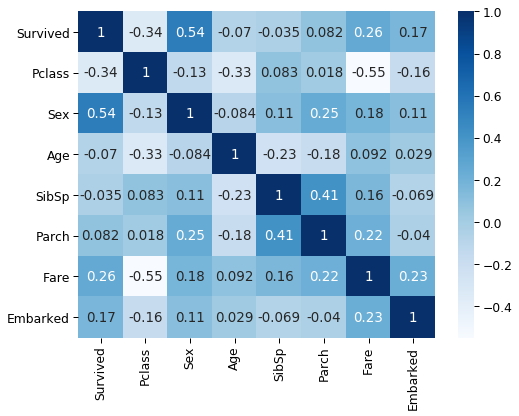

In [762]:
#How each feature is dependent on each other
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

train_mx = training_set.corr()

sns.heatmap(train_mx, annot=True, cmap='Blues')

In [763]:
#data preprocessing phase is over
#now we split dataset into dependent and independent variable

In [764]:
x_train=training_set.iloc[:, 1:].values
print(x_train)

[[ 3.          0.         -0.5924806  ...  0.         -0.50244517
   0.        ]
 [ 1.          1.          0.63878901 ...  0.          0.78684529
   2.        ]
 [ 3.          1.         -0.2846632  ...  0.         -0.48885426
   0.        ]
 ...
 [ 3.          1.          0.         ...  2.         -0.17626324
   0.        ]
 [ 1.          0.         -0.2846632  ...  0.         -0.04438104
   2.        ]
 [ 3.          0.          0.17706291 ...  0.         -0.49237783
   1.        ]]


In [765]:
y_train=training_set.iloc[:, 0].values
print(y_train)


[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [766]:
#Preparing Test Set

In [767]:
test_set.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [768]:
test_set.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [769]:
#Handling Age missing Value
test_set['Age'].fillna(test_set['Age'].mean(), inplace=True)

In [770]:
#Handling Fair Misiing Value
test_set['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [771]:
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

In [772]:
test_set.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [773]:
#Handling Boolean Value in Sex and embarked

#Encoded the Sex and Embarked Column
sexMap = {'male':0, 'female':1}
embarkedMap = {'S':0, 'Q':1, 'C':2}

test_set['Embarked'] = test_set['Embarked'].map(embarkedMap)
test_set['Sex'] = test_set['Sex'].map(sexMap)

In [774]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [775]:
#Applying Feature Scaling
test_set[features] = sc.fit_transform(test_set[features])


In [776]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.334993,0,0,-0.498407,1
1,3,1,1.325530,1,0,-0.513274,0
2,2,0,2.514175,0,0,-0.465088,1
3,3,0,-0.259330,0,0,-0.483466,0
4,3,1,-0.655545,1,1,-0.418471,0


In [777]:
#replacing all the Nan and mfs value
x_train=np.nan_to_num(x_train)
y_train=np.nan_to_num(y_train)
test_set=np.nan_to_num(test_set)


In [778]:
#Training on Kernel SVM 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [779]:
our_pred = classifier.predict(test_set)


In [780]:
#prepairing submission file

In [781]:
test_set=np.nan_to_num(test_set)

In [782]:
test_data=pd.read_csv("test.csv")


In [783]:
submission = pd.DataFrame({
            "PassengerId": test_data["PassengerId"],
            "Survived": our_pred
    })
submission.to_csv('submission.csv', index=False)